# A First Look at the Periods and Luminosities of Cepheid Stars

* Cepheids are stars whose brightness oscillates with a stable period that appears to be strongly correlated with their luminosity (or absolute magnitude).


* A lot of _monitoring_ data - repeated imaging and subsequent "photometry" of the star - can provide a measurement of the absolute magnitude (if we know the distance to it's host galaxy) and the period of the oscillation.


* Let's look at some Cepheid measurements reported by [Riess et al (2011)](Riess et al., 2011, ApJ, 730, 119).  Like the correlation function summaries, they are in the form of datapoints with error bars, where it is not clear how those error bars were derived (or what they mean).

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0) 

## A Look at Each Host Galaxy's Cepheids

Let's read in all the data, and look at each galaxy's Cepheid measurements separately. Instead of using `pandas`, we'll write our own simple data structure, and give it a custom plotting method so we can compare the different host galaxies' datasets.

In [88]:
# First, we need to know what's in the data file.

!head R11ceph.dat

#id gal m merr P logO_H bias
#this is a processed version of the R11 cepheid data
#see Riess et al., 2011, ApJ, 730, 119, Table 2
#id is the ID of the cepheid
#gal is the NGC hist number
#mags m are computed using m = F160W - 0.41*(V_I)
#mag errs are just those in the F160W mags
#errors in V-I were not given in R11
#period P is in days
#errors in the Period were not given


In [91]:
class Cepheids(object):
    
    def __init__(self,filename):
        # Read in the data and store it in this master array:
        self.data = np.loadtxt(filename)
        self.hosts = self.data[:,1].astype('int').astype('str')
        # We'll need the plotting setup to be the same each time we make a plot:
        colornames = ['red','orange','yellow','green','cyan','blue','violet','magenta','gray']
        self.colors = dict(zip(self.list_hosts(), colornames))
        self.xlimits = np.array([0.3,2.3])
        self.ylimits = np.array([30.0,17.0])
        return
    
    def list_hosts(self):
        # The list of (9) unique galaxy host names:
        return np.unique(self.hosts)
    
    def select(self,ID):
        # Pull out one galaxy's data from the master array:
        index = (self.hosts == str(ID))
        self.m = data[index,2]
        self.merr = data[index,3]
        self.logP = np.log10(data[index,4])
        return
    
    def plot(self,X):
        # Plot all the points in the dataset for host galaxy X.
        ID = str(X)
        self.select(ID)
        plt.rc('xtick', labelsize=16) 
        plt.rc('ytick', labelsize=16)
        plt.errorbar(self.logP, self.m, yerr=self.merr, fmt='.', ms=7, lw=1, color=self.colors[ID], label='NGC'+ID)
        plt.xlabel('$\\log_{10} P / {\\rm days}$',fontsize=20)
        plt.ylabel('${\\rm magnitude (AB)}$',fontsize=20)
        plt.xlim(self.xlimits)
        plt.ylim(self.ylimits)
        plt.title('Cepheid Period-Luminosity (Riess et al 2011)',fontsize=20)
        return

    def overlay_straight_line_with(self,m=0.0,c=24.0):
        # Overlay a straight line with gradient m and intercept c.
        x = self.xlimits
        y = m*x + c
        plt.plot(x, y, 'k-', alpha=0.5, lw=2)
        plt.xlim(self.xlimits)
        plt.ylim(self.ylimits)
        return
    
    def add_legend(self):
        plt.legend(loc='upper left')
        return


In [92]:
C = Cepheids('R11ceph.dat')
print C.colors

{'4258': 'blue', '5584': 'gray', '4536': 'violet', '1309': 'red', '3021': 'orange', '3370': 'yellow', '4038': 'cyan', '4639': 'magenta', '3982': 'green'}


OK, now we are all set up! Let's plot some data.

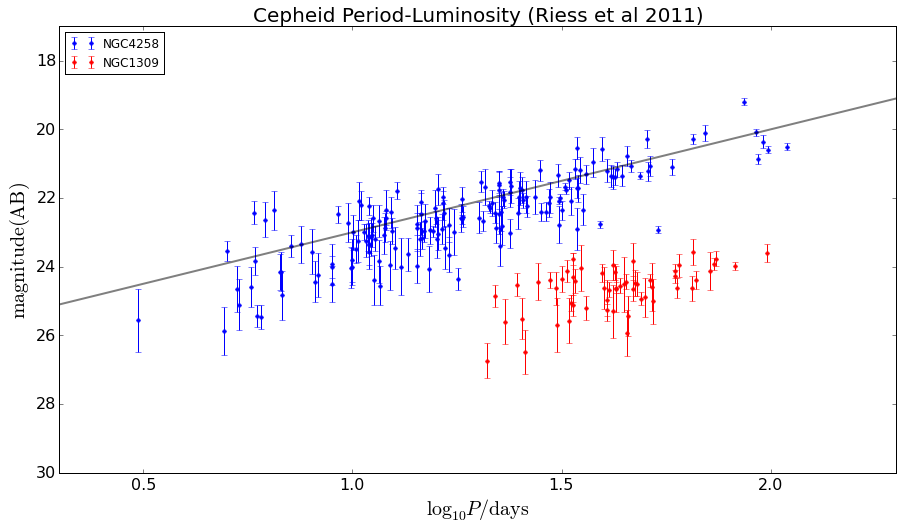

In [93]:
C.plot(4258)

C.plot(1309)

# for ID in C.list_hosts():
#     C.plot(ID)
    
C.overlay_straight_line_with(m=-3.0,c=26.0)

C.add_legend()

## Q: Is the Cepheid Period-Luminosity relation a) a power law and b) universal?

With your neighbor, try plotting up the different host galaxy's cepheid datasets. Can you find straight lines that "fit" all the data from each host? And do you get the same "fit" for each host? Why not? Notice that you can plot multiple datasets on the same axes.  